Executive Summary

In this project, we will clean, analyze data and performing algorthim to predict the fighter winner from this UFC dataset . This dataset was found on KAGGLE and it represents each fighters wins by rounds, skills and all fight from 2013 to 2018.

In [125]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
address = '/Users/abdulmajeedalroumi/lpthw/UFC/data.csv'
ufc_data = pd.read_csv(address)

In [2]:
ufc_data

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,0,0,38.0,193.0,Hounslow England,808,Amsterdam The Netherlands,Alistair Overeem,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1,0,0,36.0,172.0,"Chicago, Illinois United States",1054,"Chicago, Illinois United States",Ricardo Lamas,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
2,0,0,39.0,167.0,"Isla Vista , California USA",959,"Sacramento, California USA",Urijah Faber,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,33.0,167.0,"San Diego, CA USA",1056,"San Diego, CA USA",Danny Martinez,56.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
4,0,0,36.0,185.0,Southampton England,2005,Southampton England,Tom Watson,84.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,7,0,34.0,172.0,"El Paso, Texas United States",1137,"Coconut Creek, Florida United States",Nik Lentz,70.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,blue
2314,9,1,31.0,177.0,"Milwaukee, Wisconsin United States",1069,"Milwaukee, Wisconsin United States",Anthony Pettis,70.0,3.0,...,0.0,0.0,0.0,0.0,0.0,298.0,0.0,298.0,KO/TKO,red
2315,5,3,35.0,180.0,Amazonas Brazil,2101,Rio de Janeiro Brazil,Alan Patrick,70.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
2316,1,0,37.0,170.0,"Moses Lake, Washington United States",1200,"Houston, Texas United States",Tonya Evinger,61.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red


In [3]:
ufc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Columns: 894 entries, BPrev to winner
dtypes: float64(876), int64(9), object(9)
memory usage: 15.8+ MB


In [4]:
ufc_data.dtypes

BPrev                                int64
BStreak                              int64
B_Age                              float64
B_Height                           float64
B_HomeTown                          object
                                    ...   
R__Round5_TIP_Neutral Time         float64
R__Round5_TIP_Side Control Time    float64
R__Round5_TIP_Standing Time        float64
winby                               object
winner                              object
Length: 894, dtype: object

In [5]:
ufc_data.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,0,0,38.0,193.0,Hounslow England,808,Amsterdam The Netherlands,Alistair Overeem,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1,0,0,36.0,172.0,"Chicago, Illinois United States",1054,"Chicago, Illinois United States",Ricardo Lamas,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
2,0,0,39.0,167.0,"Isla Vista , California USA",959,"Sacramento, California USA",Urijah Faber,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,33.0,167.0,"San Diego, CA USA",1056,"San Diego, CA USA",Danny Martinez,56.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
4,0,0,36.0,185.0,Southampton England,2005,Southampton England,Tom Watson,84.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [6]:
ufc_data['winner'].value_counts()

red           1327
blue           951
no contest      24
draw            16
Name: winner, dtype: int64

In [7]:
ufc_data.describe(include='O')

,B_HomeTown,B_Location,B_Name,Date,R_HomeTown,R_Location,R_Name,winby,winner
count,2301,2305,2318,2318,2293,2294,2318,2282,2318
unique,724,567,949,389,652,504,842,3,4
top,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Kevin Lee,10/08/2018,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Donald Cerrone,DEC,red
freq,46,58,11,76,65,99,14,1111,1327


  Donlad cerrone tends to be on the red side with 14 wins since 2013
  
  kevin lee tends to be on the blue side with 11 wins
  
  Fights mostly won by DEC
        

In [8]:
ufc_data.isnull()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,False,False
3,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,False,False
4,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
2314,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2315,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
2316,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False


From our initial exploration, we observe that the ufc datasets contain various columns which are not needed in order to perform our analysis. This is an important point as we could also observe that several columns in the datasets contained missing values.

Another observation is that the datasets contain equivalent columns but with different names, which will need to be corrected

In [9]:
ufc_data.fillna(value=0, inplace=True)

In [10]:
ufc_data

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,0,0,38.0,193.0,Hounslow England,808,Amsterdam The Netherlands,Alistair Overeem,120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DEC,blue
1,0,0,36.0,172.0,"Chicago, Illinois United States",1054,"Chicago, Illinois United States",Ricardo Lamas,65.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DEC,red
2,0,0,39.0,167.0,"Isla Vista , California USA",959,"Sacramento, California USA",Urijah Faber,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KO/TKO,red
3,0,0,33.0,167.0,"San Diego, CA USA",1056,"San Diego, CA USA",Danny Martinez,56.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DEC,red
4,0,0,36.0,185.0,Southampton England,2005,Southampton England,Tom Watson,84.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DEC,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,7,0,34.0,172.0,"El Paso, Texas United States",1137,"Coconut Creek, Florida United States",Nik Lentz,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KO/TKO,blue
2314,9,1,31.0,177.0,"Milwaukee, Wisconsin United States",1069,"Milwaukee, Wisconsin United States",Anthony Pettis,70.0,3.0,...,0.0,0.0,0.0,0.0,0.0,298.0,0.0,298.0,KO/TKO,red
2315,5,3,35.0,180.0,Amazonas Brazil,2101,Rio de Janeiro Brazil,Alan Patrick,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KO/TKO,red
2316,1,0,37.0,170.0,"Moses Lake, Washington United States",1200,"Houston, Texas United States",Tonya Evinger,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KO/TKO,red


In [11]:
ufc_data.isnull()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2314,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2315,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2316,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
dropdata = ufc_data.drop(['B_ID','B_Name','R_ID','R_Name','winby','Date','Event_ID', 'Fight_ID','Max_round','Last_round'],axis=1)
dropdata = dropdata.drop(['B_Weight','R_Weight','B_HomeTown','R_HomeTown','B_Location','R_Location'],axis=1)
dropdata.rename(columns={'BPrev':'B__Prev',
                         'RPrev':'R__Prev',
                         'B_Age':'B_Age',
                         'B_Height':'B__Height',
                         'B_Weight':'B__Weight',
                         'R_Age':'R__Age',
                         'R_Height':'R__Height',
                         'R_Weight':'R__Weight',
                         'BStreak':'B__Streak',
                         'RStreak': 'R__Streak'},inplace=True)
dropdata.describe()

,B__Prev,B__Streak,B_Age,B__Height,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,...,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,2.391286,0.744607,31.543141,176.026747,0.053063,0.784297,0.410267,2.737274,1.177739,10.815358,...,29.284297,3.918896,7.559965,0.798533,0.463330,0.501294,1.399051,30.603969,0.510354,35.305436
std,2.539978,1.145596,4.957445,17.493625,0.259871,1.389608,0.922747,4.766856,2.192778,15.186241,...,105.072644,27.979205,40.083680,9.057408,4.622587,4.578076,13.892178,108.390717,7.272762,123.807764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,29.000000,172.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,31.000000,177.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,1.000000,35.000000,182.000000,0.000000,1.000000,0.000000,4.000000,1.750000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.000000,10.000000,48.000000,213.000000,3.000000,13.000000,8.000000,47.000000,20.000000,124.000000,...,1259.000000,633.000000,666.000000,144.000000,91.000000,62.000000,273.000000,1291.000000,200.000000,1473.000000


In [37]:
raw_data_count = ufc_data.shape[0]
raw_data_count

2318

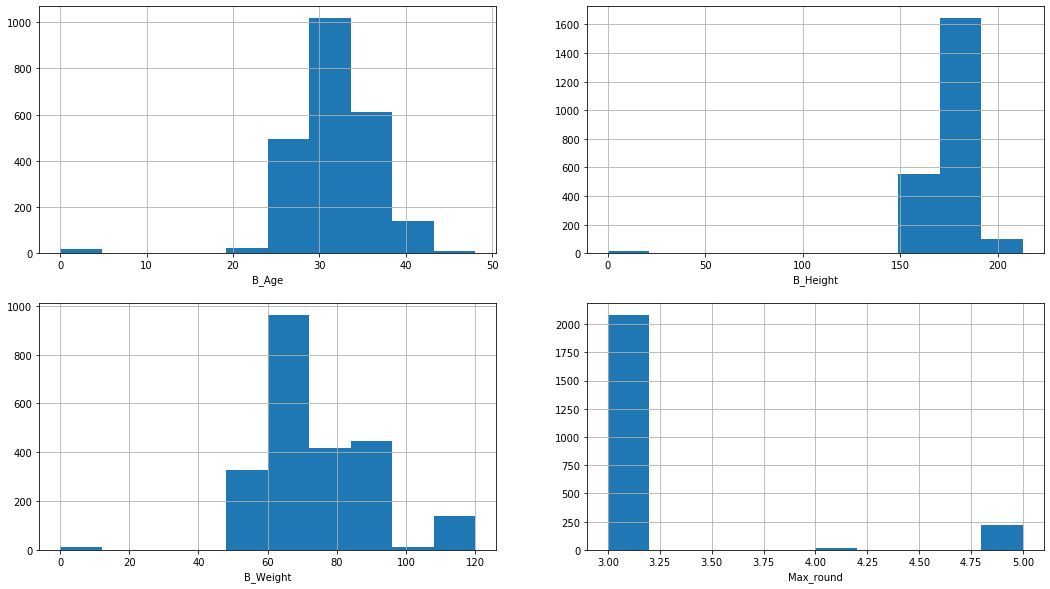

In [38]:
cols = ["B_Age", "B_Height", "B_Weight", "Max_round"]

fig = plt.figure(figsize=(18,10))
for r in range(0,4):
    ax = fig.add_subplot(2,2,r+1)
    ax = ufc_data[cols[r]].hist()
    ax.set_xlabel(cols[r])

In [48]:
ufc_data['winner'] = ufc_data['winner'].astype('category')

In [49]:
# winnerType = list(dropdata.select_dtyper(include=['O']).columns)
# for col in winnerType:
#     dropdata[col] = dropdata[col].astype('category')

In [52]:
cat_columns = dropdata.select_dtypes(['category']).columns
dropdata[cat_columns] = dropdata[cat_columns].apply(lambda x: x.cat.codes)
dropdata.info()
dropdata.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Columns: 878 entries, B__Prev to winner
dtypes: float64(874), int64(3), int8(1)
memory usage: 15.5 MB


,B__Prev,B__Streak,B_Age,B__Height,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,...,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winner
2313,7,0,34.0,172.0,0.0,3.0,3.0,24.0,7.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2314,9,1,31.0,177.0,3.0,6.0,1.0,2.0,0.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,298.0,0.0,298.0,3
2315,5,3,35.0,180.0,0.0,1.0,1.0,25.0,12.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2316,1,0,37.0,170.0,0.0,0.0,0.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2317,0,0,23.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score
from sklearn.model_selection import train_test_split,learning_curve

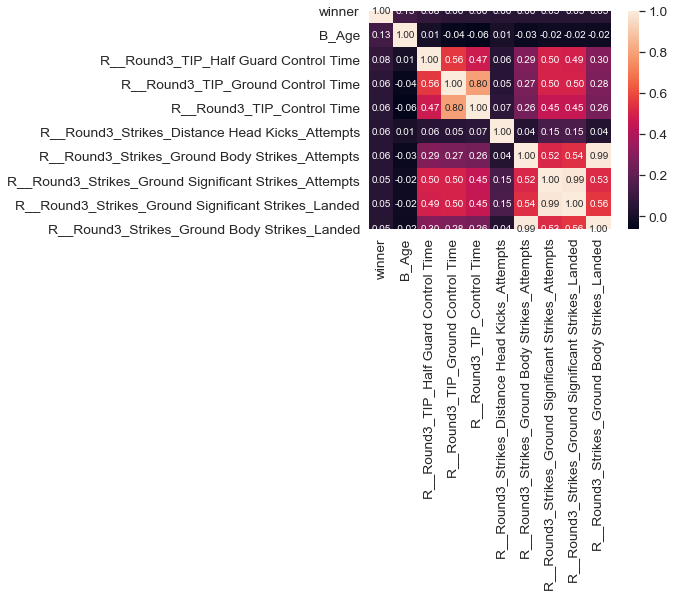

In [167]:
import seaborn as sns
k = 10 #number of variables for heatmap
corrmat = dropdata.corr()
cols = corrmat.nlargest(k, 'winner')['winner'].index
cm = np.corrcoef(dropdata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [116]:
# import seaborn as sns

# print(plt.get_backend())

# # close any existing plots
# plt.close("all")
# # select out the desired columns
# df = ufc_data.iloc[:, 3:].select_dtypes(include=['float64','int64'])

# # copy columns to double size of dataframe
# df2 = ufc_data.copy()
# df2.columns = "c_" + df2.columns
# df3 = pd.concat([df, df2], axis=1)

# # get the correlation coefficient between the different columns
# corr = df3.iloc[:, 1:].corr()
# arr_corr = corr.values()
# # mask out the top triangle
# arr_corr[np.triu_indices_from(arr_corr)] = np.nan

# fig, ax = plt.subplots(figsize=(24, 18))

# hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
#                  fmt='.2f', annot_kws={'size': 3}, annot=True, 
#                  square=True, cmap=plt.cm.Blues)

# ticks = np.arange(corr.shape[0]) + 0.5
# ax.set_xticks(ticks)
# ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
# ax.set_yticks(ticks)
# ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

# ax.set_title('correlation matrix')
# plt.tight_layout()
# plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)

In [189]:
import itertools

def plot_cm(cm, title):
    plt.figure()
    labels = ['Blue','Draw','No Contest','Red']
    plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    
    fmt = 'd'
    thresh = cm.max() /2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()

In [207]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score

def randfor(X_train,y_train,X_test,y_test,results):
    randomfor = RandomForestClassifier(max_features="sqrt",
                                       n_estimators = 700,
                                       max_depth = None,
                                       n_jobs=-1
                                      )
    
    
    randomfor.fit(X_train,y_train)
    y_pred = randomfor.predict(X_test)
    results['Random Forests'] = {}
    results['Random Forests']['Accuracy'] = accuracy_score(y_test,y_pred)
    results['Random Forests']['cm'] = confusion_matrix(y_test,y_pred)
    results['Random Forests']['f1_macro'] = f1_score(y_test,y_pred,average='macro')
    results['Random Forests']['f1_class'] = f1_score(y_test,y_pred,average=None)
    results['Random Forests']['pred_prob'] = randomfor.predict_proba(X_test)
    return

In [183]:
ufc_data.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,0,0,38.0,193.0,Hounslow England,808,Amsterdam The Netherlands,Alistair Overeem,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1,0,0,36.0,172.0,"Chicago, Illinois United States",1054,"Chicago, Illinois United States",Ricardo Lamas,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
2,0,0,39.0,167.0,"Isla Vista , California USA",959,"Sacramento, California USA",Urijah Faber,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,33.0,167.0,"San Diego, CA USA",1056,"San Diego, CA USA",Danny Martinez,56.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
4,0,0,36.0,185.0,Southampton England,2005,Southampton England,Tom Watson,84.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [208]:
def pprint_results(results):
    y_test = results.pop('y_test')
    for model in results.keys():
        print(f"=============RESULTS FOR {model}===========")
        print(f"Accuracy of {model} = {results[model]['Accuracy']}")
        print(f"F1 Macro of {model} = {results[model]['f1_macro']}")
        print(f"F1 Each class of {model} = {results[model]['f1_class']}")
        plot_cm(results[model]['cm'],f"{model} CM")
       # skplt.metrics.plot_roc(Y_test, results[model]['pred_prob'],title=f"{model} ROC curve")

In [209]:
def run_all(data):
    X = data.drop(['winner'], axis=1)
    y = data['winner']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    results = dict()
    results['y_test'] = y_test
    
    randfor(X_train,y_train,X_test,y_test,results)
    
    return results

In [210]:
results_stock = run_all(dropdata)

/Users/abdulmajeedalroumi/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


=============RESULTS FOR Random Forests===========
Accuracy of Random Forests = 0.5625
F1 Macro of Random Forests = 0.25545584227559187
F1 Each class of Random Forests = [0.34868421 0.         0.         0.67313916]


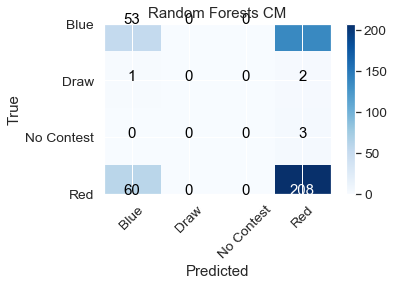

In [211]:
pprint_results(results_stock)

Next I will be performing different algorthims to see which performs the best and I will be performing more data cleaning to try and get better accuracy.